In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import os

In [16]:
types_names = {90:'Ia', 67: '91bg', 52:'Iax', 42:'II', 62:'Ibc', 
               95: 'SLSN', 15:'TDE', 64:'KN', 88:'AGN', 92:'RRL', 65:'M-dwarf',
               16:'EB',53:'Mira', 6:'MicroL', 991:'MicroLB', 992:'ILOT', 
               993:'CART', 994:'PISN',995:'MLString'}

SNANA_types = {90:11, 62:{1:3, 2:13}, 42:{1:2, 2:12, 3:14},
               67:41, 52:43, 64:51, 95:60, 994:61, 992:62,
               993:63, 15:64, 88:70, 92:80, 65:81, 16:83,
               53:84, 991:90, 6:{1:91, 2:93}}

In [33]:
cases = os.listdir('/media/RESSPECT/data/PLAsTiCC/for_metrics/ddf/samples/')

In [34]:
#cases.remove('fiducial.csv')
#cases.remove('random.csv')
cases.remove('.ipynb_checkpoints')
cases.remove('non-survivors')
cases.remove('fiducial6000fail5999.csv')
cases.remove('90SNIa10SNIaxfail3000.csv')
cases.remove('perfect6000.csv')

# check percentages

In [35]:
for name in cases:

    fname = '/media/RESSPECT/data/PLAsTiCC/for_metrics/ddf/samples/' + name 

    data = pd.read_csv(fname)

    if 'code_zenodo' in data.keys():
        types, freq = np.unique(data['code_zenodo'].values, return_counts=True)
    else:
        types, freq = np.unique(data['code'].values, return_counts=True)
        
    print('\n')
    print('case: ' + name)
    for i in range(len(types)):
        print('perc ' + types_names[types[i]] + ' : ', round(freq[i]/data.shape[0], 2))
    print('Total number: ', data.shape[0])
    print('\n')



case: fiducial1000fail1001.csv
perc II :  0.02
perc Iax :  0.03
perc Ibc :  0.04
perc 91bg :  0.01
perc AGN :  0.0
perc Ia :  0.9
perc SLSN :  0.0
Total number:  1001




case: 99SNIa1SNIbc.csv
perc Ibc :  0.01
perc Ia :  0.99
Total number:  3000




case: all_objs_survived_SALT2_DDF.csv
perc II :  0.07
perc Iax :  0.04
perc Ibc :  0.02
perc 91bg :  0.0
perc AGN :  0.0
perc Ia :  0.87
perc SLSN :  0.0
perc CART :  0.0
Total number:  11897




case: 75SNIa25SNII.csv
perc II :  0.25
perc Ia :  0.75
Total number:  3000




case: random6000fail6000.csv
perc II :  0.14
perc Iax :  0.02
perc Ibc :  0.04
perc 91bg :  0.0
perc AGN :  0.0
perc Ia :  0.79
perc SLSN :  0.0
Total number:  6000




case: 95SNIa5SNIax.csv
perc Iax :  0.05
perc Ia :  0.95
Total number:  3000




case: 95SNIa5SNIbc.csv
perc Ibc :  0.05
perc Ia :  0.95
Total number:  3000




case: 98SNIa2SNII.csv
perc II :  0.02
perc Ia :  0.98
Total number:  3000




case: perfect1000.csv
perc Ia :  1.0
Total number:  1000




case

In [36]:
data

,id,redshift,type,code,orig_sample,queryable
0,141319,0.563,NaN,90,test,True
1,56403,0.929,NaN,90,test,True
2,90924,0.965,NaN,90,test,True
3,257812,1.209,NaN,90,test,True
4,10829,0.820,NaN,90,test,True
...,...,...,...,...,...,...
2995,84017,0.837,NaN,62,test,True
2996,298964,0.567,NaN,62,test,True
2997,259568,0.936,NaN,62,test,True
2998,288564,0.524,NaN,62,test,True


In [47]:
names = []

pop_Ia_all = []
pop_nIa_all = []
perc_Ia_all = []
perc_nIa_all = []

wfit_w_all = []
wfit_wsig_all = []
wfit_om_all = []
wfit_omsig_all = []

wfit_w_all_lowz = []
wfit_wsig_all_lowz = []
wfit_om_all_lowz = []
wfit_omsig_all_lowz = []

stan_w_all = []
stan_wsig_all = []
stan_om_all = []
stan_omsig_all = []

stan_w_all_lowz = []
stan_wsig_all_lowz = []
stan_om_all_lowz = []
stan_omsig_all_lowz = []

other_index = []
other_name = []

for case in cases:
    
    print(case)

    names.append(case[:-4])
    
    pop = {}
    perc = {}

    samples_dir = '/media2/RESSPECT/data/PLAsTiCC/for_metrics/posteriors/DDF/' + case[:-4] + '/'

    fname = '/media/RESSPECT/data/PLAsTiCC/for_metrics/ddf/samples/' + case
    
    data = pd.read_csv(fname)
    if 'code_zenodo' in data.keys():
        stats = np.unique(data['code_zenodo'].values, return_counts=True)
    else:
        stats = np.unique(data['code'].values, return_counts=True)

    if case[0] == 'a':
        fname_cosmo = case[:-4] + '/results/test_salt2mu_' + case[:-4] + '_3000DDF.M0DIF.cospar'    
    else:
        fname_cosmo = case[:-4] + '/results/test_salt2mu_' + case[:-4] + '.M0DIF.cospar'
    cosmofit = pd.read_csv(fname_cosmo, comment='#', delim_whitespace=True, names=['w', 'wsig_marg',  'OM',  'OM_sig',  'chi2',  
                            'Ndof',  'sigint', 'wran',  'OMran',  'label'])
    wfit_w_all.append(cosmofit['w'].values[0])
    wfit_wsig_all.append(cosmofit['wsig_marg'].values[0])
    wfit_om_all.append(cosmofit['OM'].values[0])
    wfit_omsig_all.append(cosmofit['OM_sig'].values[0])
    
    if case[0] == 'a':
        fname_cosmo_lowz = case[:-4] + '/results/test_salt2mu_lowz_withbias_' + case[:-4] + '_3000DDF.M0DIF.cospar'
    else:
        fname_cosmo_lowz = case[:-4] + '/results/test_salt2mu_lowz_withbias_' + case[:-4] + '.M0DIF.cospar'
    cosmofit_lowz = pd.read_csv(fname_cosmo_lowz, delim_whitespace=True,
                          comment='#', names=['w', 'wsig_marg',  'OM',  'OM_sig',  'chi2',  
                                              'Ndof',  'sigint', 'wran',  'OMran',  'label'])
    wfit_w_all_lowz.append(cosmofit_lowz['w'].values[0])
    wfit_wsig_all_lowz.append(cosmofit_lowz['wsig_marg'].values[0])
    wfit_om_all_lowz.append(cosmofit_lowz['OM'].values[0])
    wfit_omsig_all_lowz.append(cosmofit_lowz['OM_sig'].values[0])

    fname_stan = case[:-4] + '/results/stan_summary_' + case[:-4] + '.dat'
    op1 = open(fname_stan, 'r')
    lin1 = op1.readlines()
    op1.close()

    for i in range(len(lin1)):
        if lin1[i].split(' ')[0] == 'om':
            c = 3
            found = False
            while not found:
                if lin1[i].split(' ')[c] != '':
                    stan_om_all.append(lin1[i].split(' ')[c])
                    found=True
                else:
                    c = c + 1
                    
            d = 8
            found2 = False
            while not found2:
                if lin1[i].split(' ')[d] != '':
                    stan_omsig_all.append(lin1[i].split(' ')[d])
                    found2 = True
                else:
                    d = d + 1
        elif lin1[i].split(' ')[0] == 'w':
            c = 3
            found = False
            while not found:
                if lin1[i].split(' ')[c] != '':
                    stan_w_all.append(lin1[i].split(' ')[c])
                    found=True
                else:
                    c = c + 1
                    
            d = 8
            found2 = False
            while not found2:
                if lin1[i].split(' ')[d] != '':
                    stan_wsig_all.append(lin1[i].split(' ')[d])
                    found2 = True
                else:
                    d = d + 1
    
    fname_stan = case[:-4] + '/results/stan_summary_' + case[:-4] + '_lowz_withbias.dat'
    op2 = open(fname_stan, 'r')
    lin2 = op2.readlines()
    op2.close()
    
    for j in range(len(lin2)):
        if lin2[j].split(' ')[0] == 'om':
            stan_om_all_lowz.append(lin2[j].split(' ')[3])
            stan_omsig_all_lowz.append(lin2[j].split(' ')[8])
                
        elif lin2[j].split(' ')[0] == 'w':
            c = 3
            found = False
            while not found:
                if lin2[j].split(' ')[c] != '':
                    stan_w_all_lowz.append(lin2[j].split(' ')[c])
                    found=True
                else:
                    c = c + 1
                        
                     
            d = 8
            found2 = False
            while not found2:
                if lin2[j].split(' ')[d] != '':
                    stan_wsig_all_lowz.append(lin2[j].split(' ')[d])
                    found2 = True
                else:
                    d = d + 1
                        
    if 90 in stats[0]: 
        Ia_code = 90
    else:
        Ia_code = 11
        
    flag_Ia = np.array(stats[0]) == Ia_code
    
    pop[Ia_code] = stats[1][flag_Ia][0]
    perc[Ia_code] = round(100 * stats[1][flag_Ia][0]/data.shape[0])
    
    if  len(stats[0]) == 2:
        other_code = [item for item in stats[0] if item != Ia_code][0]
        pop[other_code] = stats[1][flag_Ia][0]
        perc[other_code] = round(100 * stats[1][flag_Ia][0]/data.shape[0])
            
        pop_nIa_all.append(pop[other_code])
        perc_nIa_all.append(perc[other_code])
        other_index.append(other_code)
        other_name.append(types_names[other_code])
        
    elif len(stats[0]) > 2:
        other_code = [item for item in stats[0] if item != Ia_code]
        for item in range(flag_Ia.shape[0]):
            if not flag_Ia[item]:
                pop[stats[0][item]] = stats[1][item]
                perc[stats[0][item]] = round(100 * stats[1][item]/data.shape[0])
                
        pop_nIa_all.append([pop[item] for item in other_code])
        perc_nIa_all.append([perc[item] for item in other_code])
        other_index.append(other_code)
        other_name.append([types_names[i] for i in other_code])
        
    elif len(stats[0]) == 1:
        other_code = '--'
        pop_nIa_all.append(None)
        perc_nIa_all.append(None)
        other_index.append(None)
        other_name.append(None)

    pop_Ia_all.append(pop[Ia_code])
    perc_Ia_all.append(perc[Ia_code])
    
    fname_fitres = name + 'results/master_fitres_new.fitres'
    
        
        
data_all = {}
data_all['case'] = names
data_all['other_name'] = other_name
data_all['other_code'] = other_index
data_all['nIa'] = pop_Ia_all
data_all['nothers'] = pop_nIa_all
data_all['perc_Ia'] = perc_Ia_all
data_all['perc_others'] = perc_nIa_all
data_all['wfit_w'] = wfit_w_all
data_all['wfit_wsig'] = wfit_wsig_all
data_all['wfit_om'] = wfit_om_all
data_all['wfit_omsig'] = wfit_omsig_all
data_all['wfit_w_lowz'] = wfit_w_all_lowz
data_all['wfit_wsig_lowz'] = wfit_wsig_all_lowz
data_all['wfit_om_lowz'] = wfit_om_all_lowz
data_all['wfit_omsig_lowz'] = wfit_omsig_all_lowz
data_all['stan_w'] = stan_w_all
data_all['stan_wsig'] = stan_wsig_all
data_all['stan_om'] = stan_om_all
data_all['stan_omsig'] = stan_omsig_all
data_all['stan_w_lowz'] = stan_w_all_lowz
data_all['stan_wsig_lowz'] = stan_wsig_all_lowz
data_all['stan_om_lowz'] = stan_om_all_lowz
data_all['stan_omsig_lowz'] = stan_omsig_all_lowz

data_all = pd.DataFrame(data_all)

fiducial1000fail1001.csv
99SNIa1SNIbc.csv
all_objs_survived_SALT2_DDF.csv
75SNIa25SNII.csv
random6000fail6000.csv
95SNIa5SNIax.csv
95SNIa5SNIbc.csv
98SNIa2SNII.csv
perfect1000.csv
92SNIa8SNIbc.csv
perfect3000.csv
72SNIa28SNII.csv
99SNIa1SNII.csv
99SNIa1SNIax.csv
98SNIa2SNIax.csv
random3000fail2998.csv
random1000fail1000.csv
95SNIa5SNII.csv
86SNIa14SNIaxfail3000.csv
fiducial3000fail3001.csv
90SNIa10SNII.csv
98SNIa2SNIbc.csv


In [49]:
data_all.to_csv('summary_cases.csv', index=False)
data_all.to_csv('/media2/RESSPECT2/data/posteriors/summary_cases.csv', index=False)

In [50]:
data_all = pd.read_csv('summary_cases.csv', index_col=False)

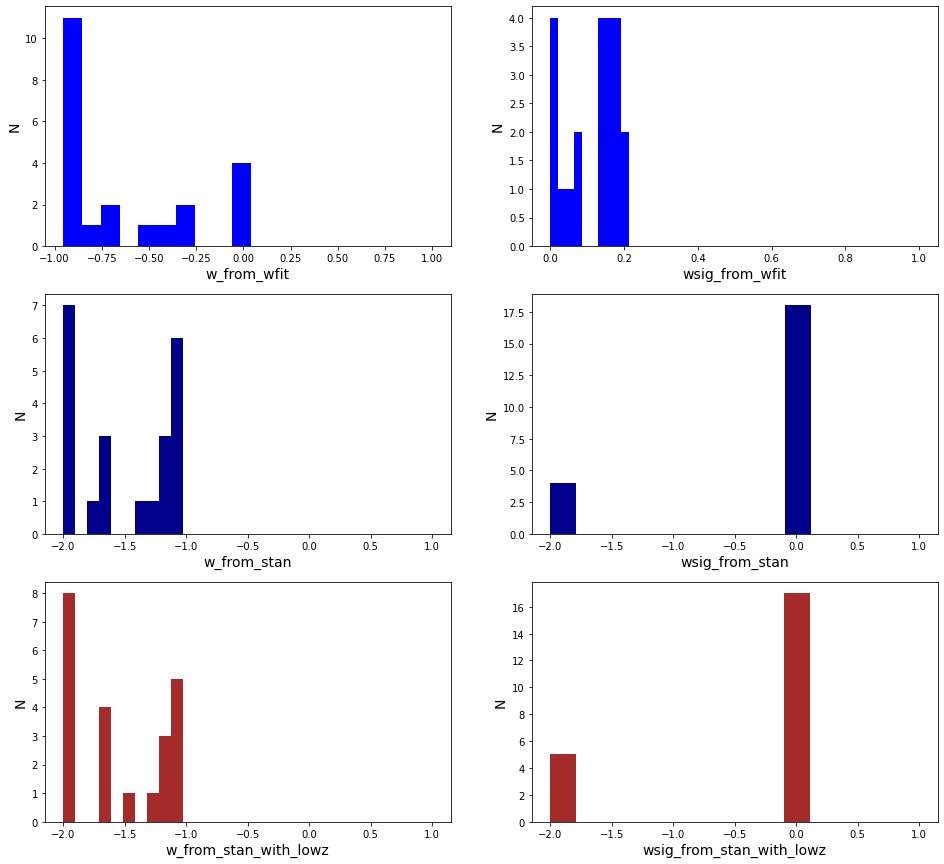

In [51]:
flag_w = data_all['wfit_w'].values < 1000

plt.figure(figsize=(16,15))

plt.subplot(3,2,1)
plt.hist(data_all['wfit_w'][~flag_w], color='darkblue')
plt.hist(data_all['wfit_w'][flag_w], color='blue')
plt.xlabel('w_from_wfit', fontsize=14)
plt.ylabel('N', fontsize=14)


plt.subplot(3,2,2)
plt.hist(data_all['wfit_wsig'][~flag_w], color='darkblue')
plt.hist(data_all['wfit_wsig'][flag_w], color='blue')
plt.xlabel('wsig_from_wfit', fontsize=14)
plt.ylabel('N', fontsize=14)

plt.subplot(3,2,3)
plt.hist(data_all['stan_w'][~flag_w], color='b')
plt.hist(data_all['stan_w'][flag_w], color='darkblue')
plt.xlabel('w_from_stan', fontsize=14)
plt.ylabel('N', fontsize=14)

plt.subplot(3,2,4)
plt.hist(data_all['stan_wsig'][~flag_w], color='b')
plt.hist(data_all['stan_wsig'][flag_w], color='darkblue')
plt.xlabel('wsig_from_stan', fontsize=14)
plt.ylabel('N', fontsize=14)


plt.subplot(3,2,5)
plt.hist(data_all['stan_w_lowz'][~flag_w], color='green', alpha=0.5)
plt.hist(data_all['stan_w_lowz'][flag_w], color='brown')
plt.xlabel('w_from_stan_with_lowz', fontsize=14)
plt.ylabel('N', fontsize=14)

plt.subplot(3,2,6)
plt.hist(data_all['stan_wsig_lowz'][~flag_w], color='green', alpha=0.5)
plt.hist(data_all['stan_wsig_lowz'][flag_w], color='brown')
plt.xlabel('wsig_from_stan_with_lowz', fontsize=14)
plt.ylabel('N', fontsize=14)



plt.show()

In [52]:
def highlight_col(x):
    r = 'background-color: pink'
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    df1.iloc[:, 5] = r
    
    return df1    

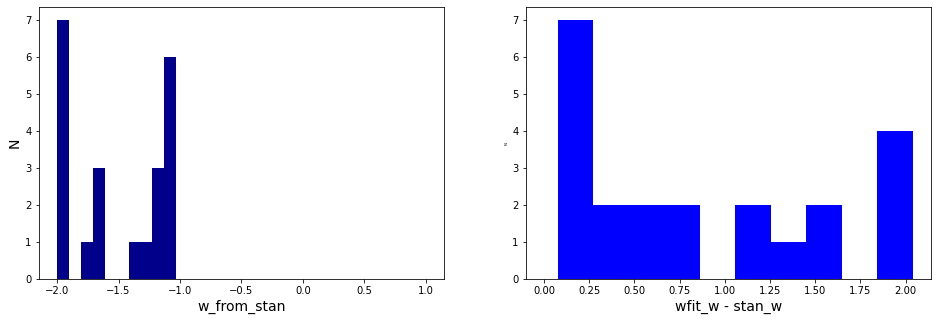

In [53]:
wdiff = data_all['wfit_w'].values - data_all['stan_w'].values

plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
plt.hist(data_all['stan_w'][~flag_w], color='b')
plt.hist(data_all['stan_w'][flag_w], color='darkblue')
plt.xlabel('w_from_stan', fontsize=14)
plt.ylabel('N', fontsize=14)

plt.subplot(1,2,2)
plt.hist(wdiff[~flag_w], color='darkblue')
plt.hist(wdiff[flag_w], color='b')
plt.xlabel('wfit_w - stan_w', fontsize=14)
plt.ylabel('N', fontsize=4)

plt.show()

In [68]:
from astropy.cosmology import FlatLambdaCDM
    
cosmo = FlatLambdaCDM(H0=72, Om0=0.3)
theor_dist = [cosmo.distmod(z).value for z in np.arange(0.001,1.5,0.005)]

for name in cases[:1]:
    
    fname_fitres = name[:-4] + '/results/test_salt2mu_' + name[:-4] + '.fitres'
    fitres = pd.read_csv(fname_fitres, comment='#', delim_whitespace=True)
    
    flag = fitres['SIM_TYPE_INDEX'].values == 11
    z = fitres['SIM_ZCMB'].values
    mu = fitres['MU'].values
    muerr = fitres['MUERR'].values
    
    
    fig = plt.figure(figsize=(10,8))
        
    ax = fig.add_subplot(111)
    ax.set_title(name, fontsize=26)

    if sum(flag) > 0:
        plt.errorbar(z[flag], mu[flag], yerr=muerr[flag], fmt='o', alpha=0.1, label='spec-Ia', color='blue')
    
    if sum(~flag) > 0:
        plt.errorbar(z[~flag], mu[~flag], yerr=muerr[~flag], fmt='^', alpha=0.1, label='photo-Ia', color='green')
       
    plt.plot(np.arange(0.001, 1.5,0.005), theor_dist, label='w = -1', color='red')

    w = str(cosmofit['w'].values[0])
    if len(w) >= 6:
        w1 = w[:6]
    else:
        w1 = w.ljust(6, '0')
            
    werr = str(cosmofit['wsig_marg'].values[0])
    if len(werr) >= 6:
        werr1 = werr[:5]
    else:
        werr1 = werr.ljust(5, '0')
            
    flag_case = data_all['case'].values == name[:-4]
    ax.text(0.2, 32, 'stan = ' + str(data_all[flag_case]['stan_w'].values[0]) + r' $\pm$ ' + str(data_all[flag_case]['stan_wsig'].values[0]), fontsize=20)
    ax.text(0.2, 30, r'wfit = ' + w1 + r' $\pm$ ' + werr1 , fontsize=20)
        
    ax.set_xlabel('redshift', fontsize=22)
    ax.set_ylabel('mu', fontsize=22)
    plt.legend(fontsize=22, loc='lower right')

    plt.savefig('plots/distances/dist_' + name[:-4] + '.png')
    plt.close('all')

In [77]:
for name in cases:

    fname_fitres = name[:-4] + '/results/test_salt2mu_lowz_withbias_' + name[:-4] + '.fitres'
    fitres = pd.read_csv(fname_fitres, comment='#', delim_whitespace=True)
    
    flag = np.logical_or(fitres['SIM_TYPE_INDEX'].values == 11, fitres['SIM_TYPE_INDEX'].values == 1)
    z = fitres['SIM_ZCMB'].values
    mu = fitres['MU'].values
    muerr = fitres['MUERR'].values
    
    fig = plt.figure(figsize=(10,8))
        
    ax = fig.add_subplot(111)
    ax.set_title(name, fontsize=26)

    if sum(flag) > 0:
        #data2 = pd.concat([data[flag], lowz], ignore_index=True)
        plt.errorbar(z[flag], mu[flag], yerr=muerr[flag], fmt='o', alpha=0.1, label='spec-Ia', color='blue')
    
    if sum(~flag) > 0:
        plt.errorbar(z[~flag], mu[~flag], yerr=muerr[~flag], fmt='^', alpha=0.1, label='photo-Ia', color='green')
       
    plt.plot(np.arange(0.001, 1.5,0.005), theor_dist, label='w = -1', color='red')

    w = str(cosmofit_lowz['w'].values[0])
    if len(w) >= 6:
        w1 = w[:6]
    else:
        w1 = w.ljust(6, '0')
            
    werr = str(cosmofit_lowz['wsig_marg'].values[0])
    if len(werr) >= 6:
        werr1 = werr[:5]
    else:
        werr1 = werr.ljust(5, '0')
            
    flag_case = data_all['case'].values == name[:-4]
    ax.text(0.2, 32, 'stan = ' + str(data_all[flag_case]['stan_w_lowz'].values[0]) + r' $\pm$ ' + \
            str(data_all[flag_case]['stan_wsig_lowz'].values[0]), fontsize=20)
    ax.text(0.2, 30, r'wfit = ' + w1 + r' $\pm$ ' + werr1 , fontsize=20)
        
    ax.set_xlabel('redshift', fontsize=22)
    ax.set_ylabel('mu', fontsize=22)
    plt.legend(fontsize=22, loc='lower right')

    plt.savefig('plots/distances/dist_' + name[:-4] + '_lowz_withbias.png')
    plt.close('all')